<a href="https://colab.research.google.com/github/bhogasena/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Advanced Linear Regression - Ridge and Lasso**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

*   Which variables are significant in predicting the price of a house, and
*   How well those variables describe the price of a house.


## Step 1: Reading and Understanding the Data

In [217]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import stats
import math
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.options.display.max_rows =100
pd.options.display.max_columns=None
import warnings
warnings.filterwarnings('ignore')

In [218]:
house_df = pd.read_csv("train.csv")

In [219]:
house_df.shape

(1460, 81)

In [220]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [221]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [222]:
#update data type as catergory for categorical columns though these are numerical currently
categorical_cols=['OverallCond','MSSubClass','OverallQual']
house_df[categorical_cols] = house_df[categorical_cols].astype('category')


In [223]:
# Get Numerical and Categorical features
numerical_cols=[]
categorical_cols=[]

def getNumericAndCategorical():
  numerical_cols = list(house_df.select_dtypes(include=['int64','float64']).columns)
  categorical_cols = list(house_df.select_dtypes(include=['category','object']).columns)
  return (numerical_cols, categorical_cols)
numerical_cols,categorical_cols = getNumericAndCategorical()

## Step 2: Visualising the Data

### Quantitative Variables Univariate Analysis

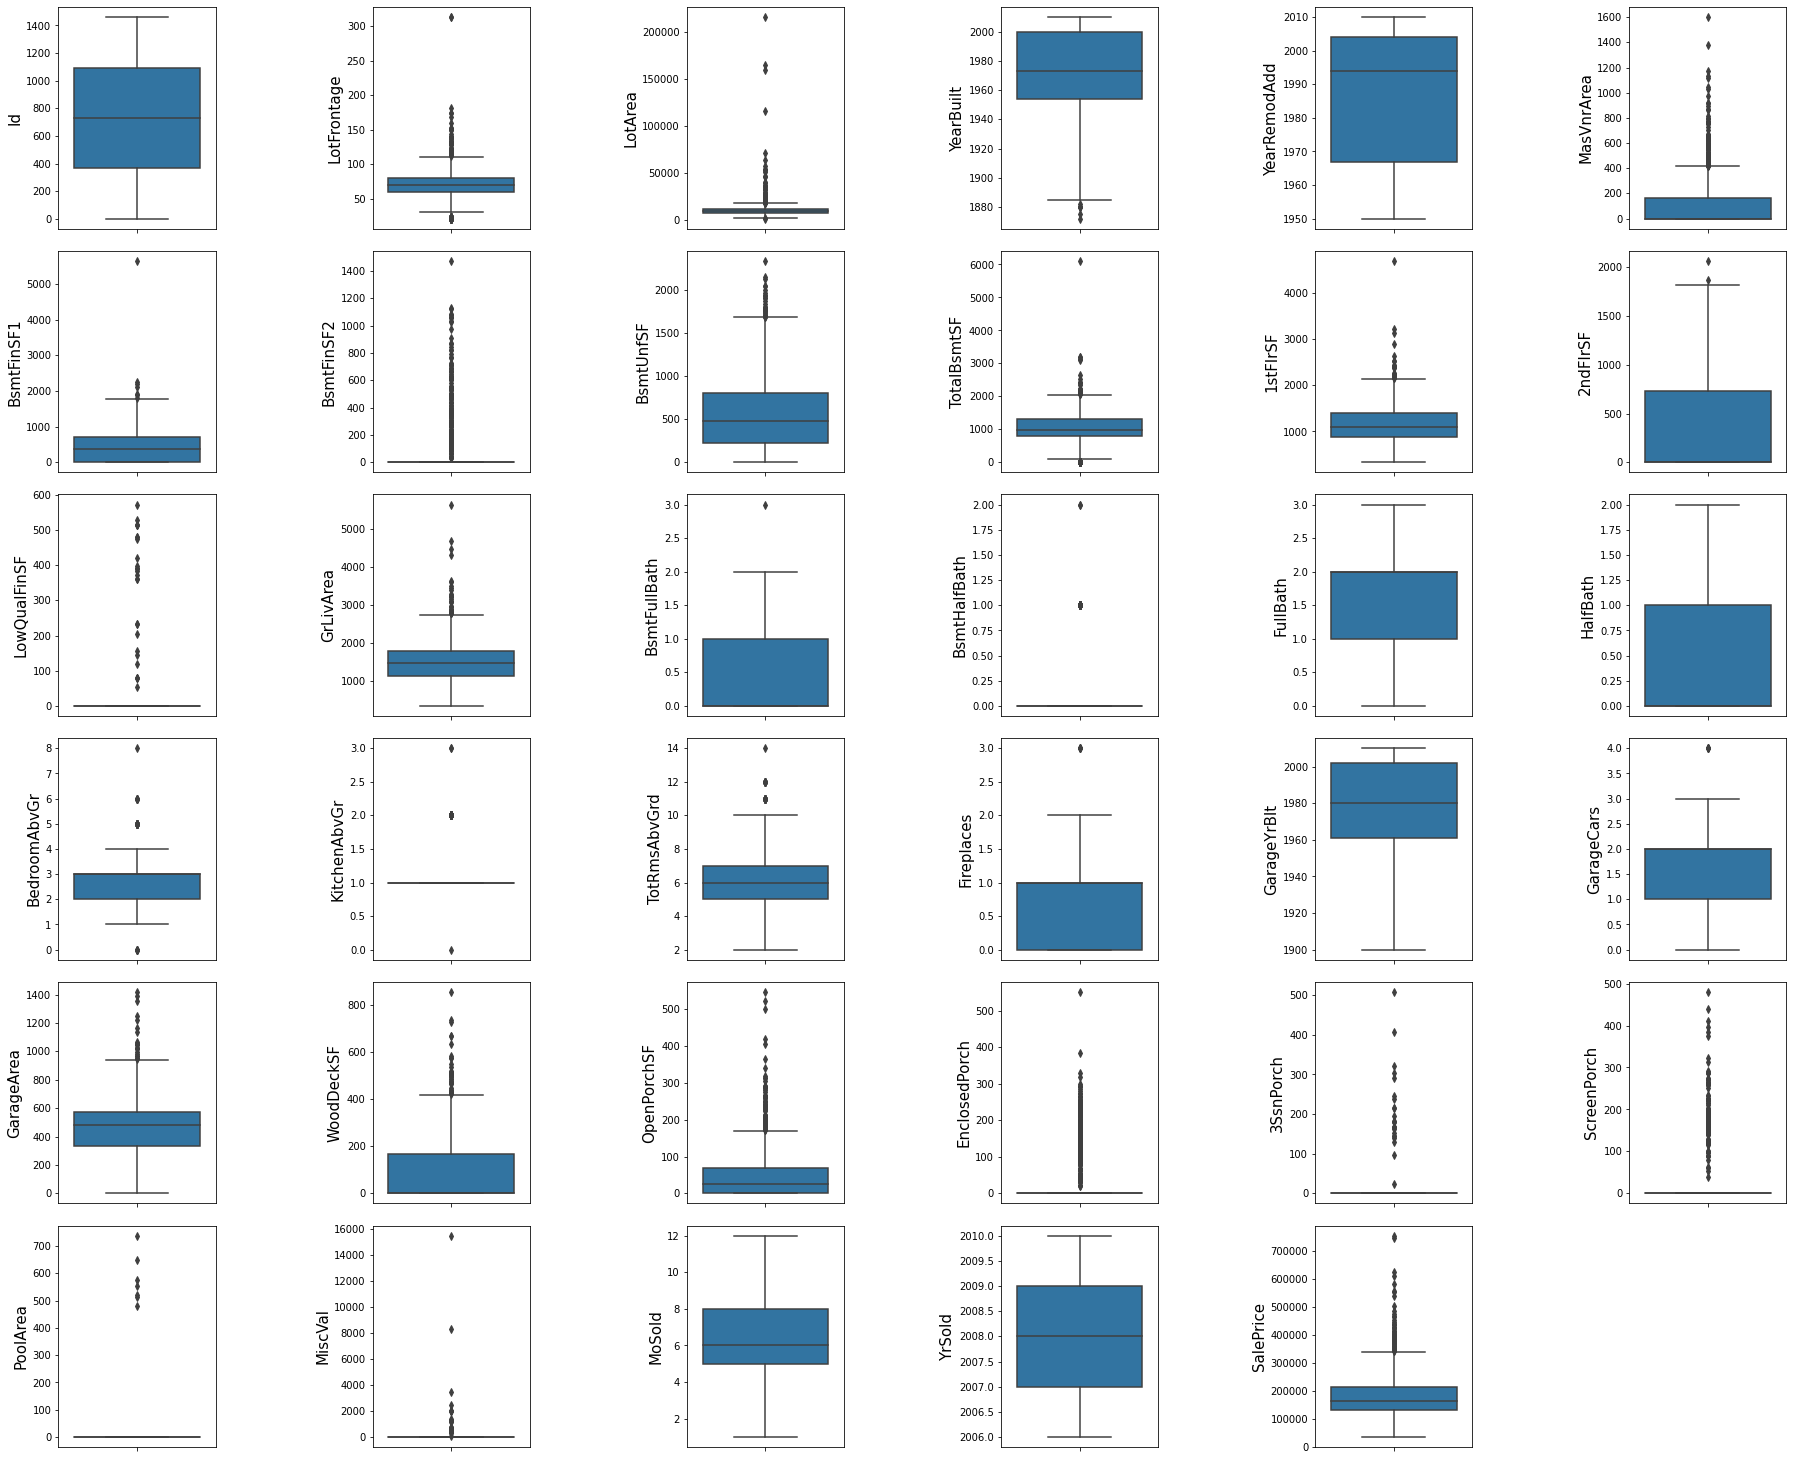

In [224]:
matplotlib.rc('ytick', labelsize=10) 
font = {'size'   : 15}

matplotlib.rc('font', **font)
def createBoxPlotsForNumericFeatures():
  fig, axes = plt.subplots(math.ceil(len(numerical_cols)/6), 6)
  col=0
  row=0
  for num_col in numerical_cols:
    sns.boxplot(data=house_df, y=num_col, ax=axes[row][col])
    col+=1
    if(col==6):
      col=0
      row+=1
  for col in range(col,6):
    axes[row, col].axis('off')

  plt.subplots_adjust(left=0,
                      bottom=0, 
                      right=4, 
                      top=5, 
                      wspace=1, 
                      hspace=0.1)
  
  plt.show()
createBoxPlotsForNumericFeatures()

### Observations
BsmtFinSF2 - As most of the houses doesn't have type1 basement SQFT so it is zero. So let's keep the data

Similary for below features houses doesn't have these options and so these values are zero. So we can't really delete these.

LowQualFinSF, BsmtHalfBath and EnclosedPorch etc.,

KitchenAbvGr - Most of the houses have one kitchen and some have more. So no need of any cleaning here.

We may need to remove some the outliers based on LotArea and MasVnrArea - during data cleaning.

### Correlation Analysis

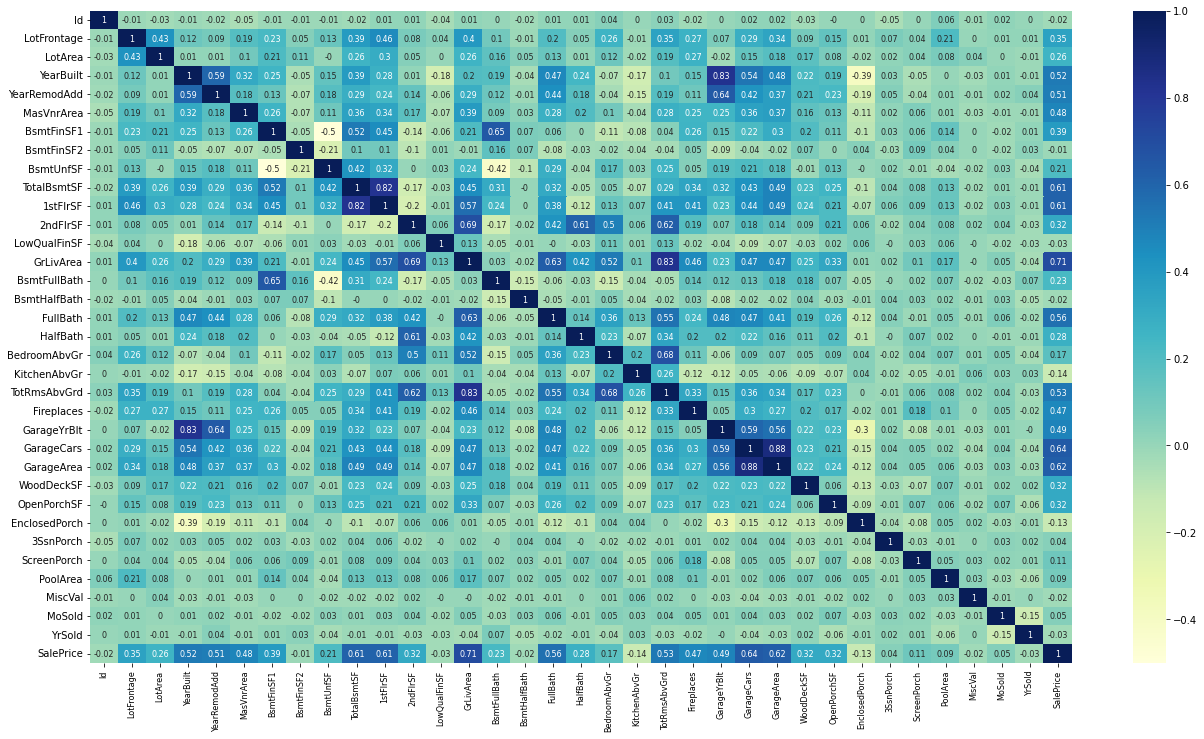

In [225]:
def plotCorrelationHeatMap():
  font = {'size'   : 8}
  matplotlib.rc('font', **font)
  plt.figure(figsize=(22,12))
  corr = round(house_df[numerical_cols].corr(),2)
  sns.heatmap(corr,annot=True,cmap="YlGnBu")
  plt.show()
plotCorrelationHeatMap()

### Bi-Variate Analysis with Quantitative features vs Target Variable

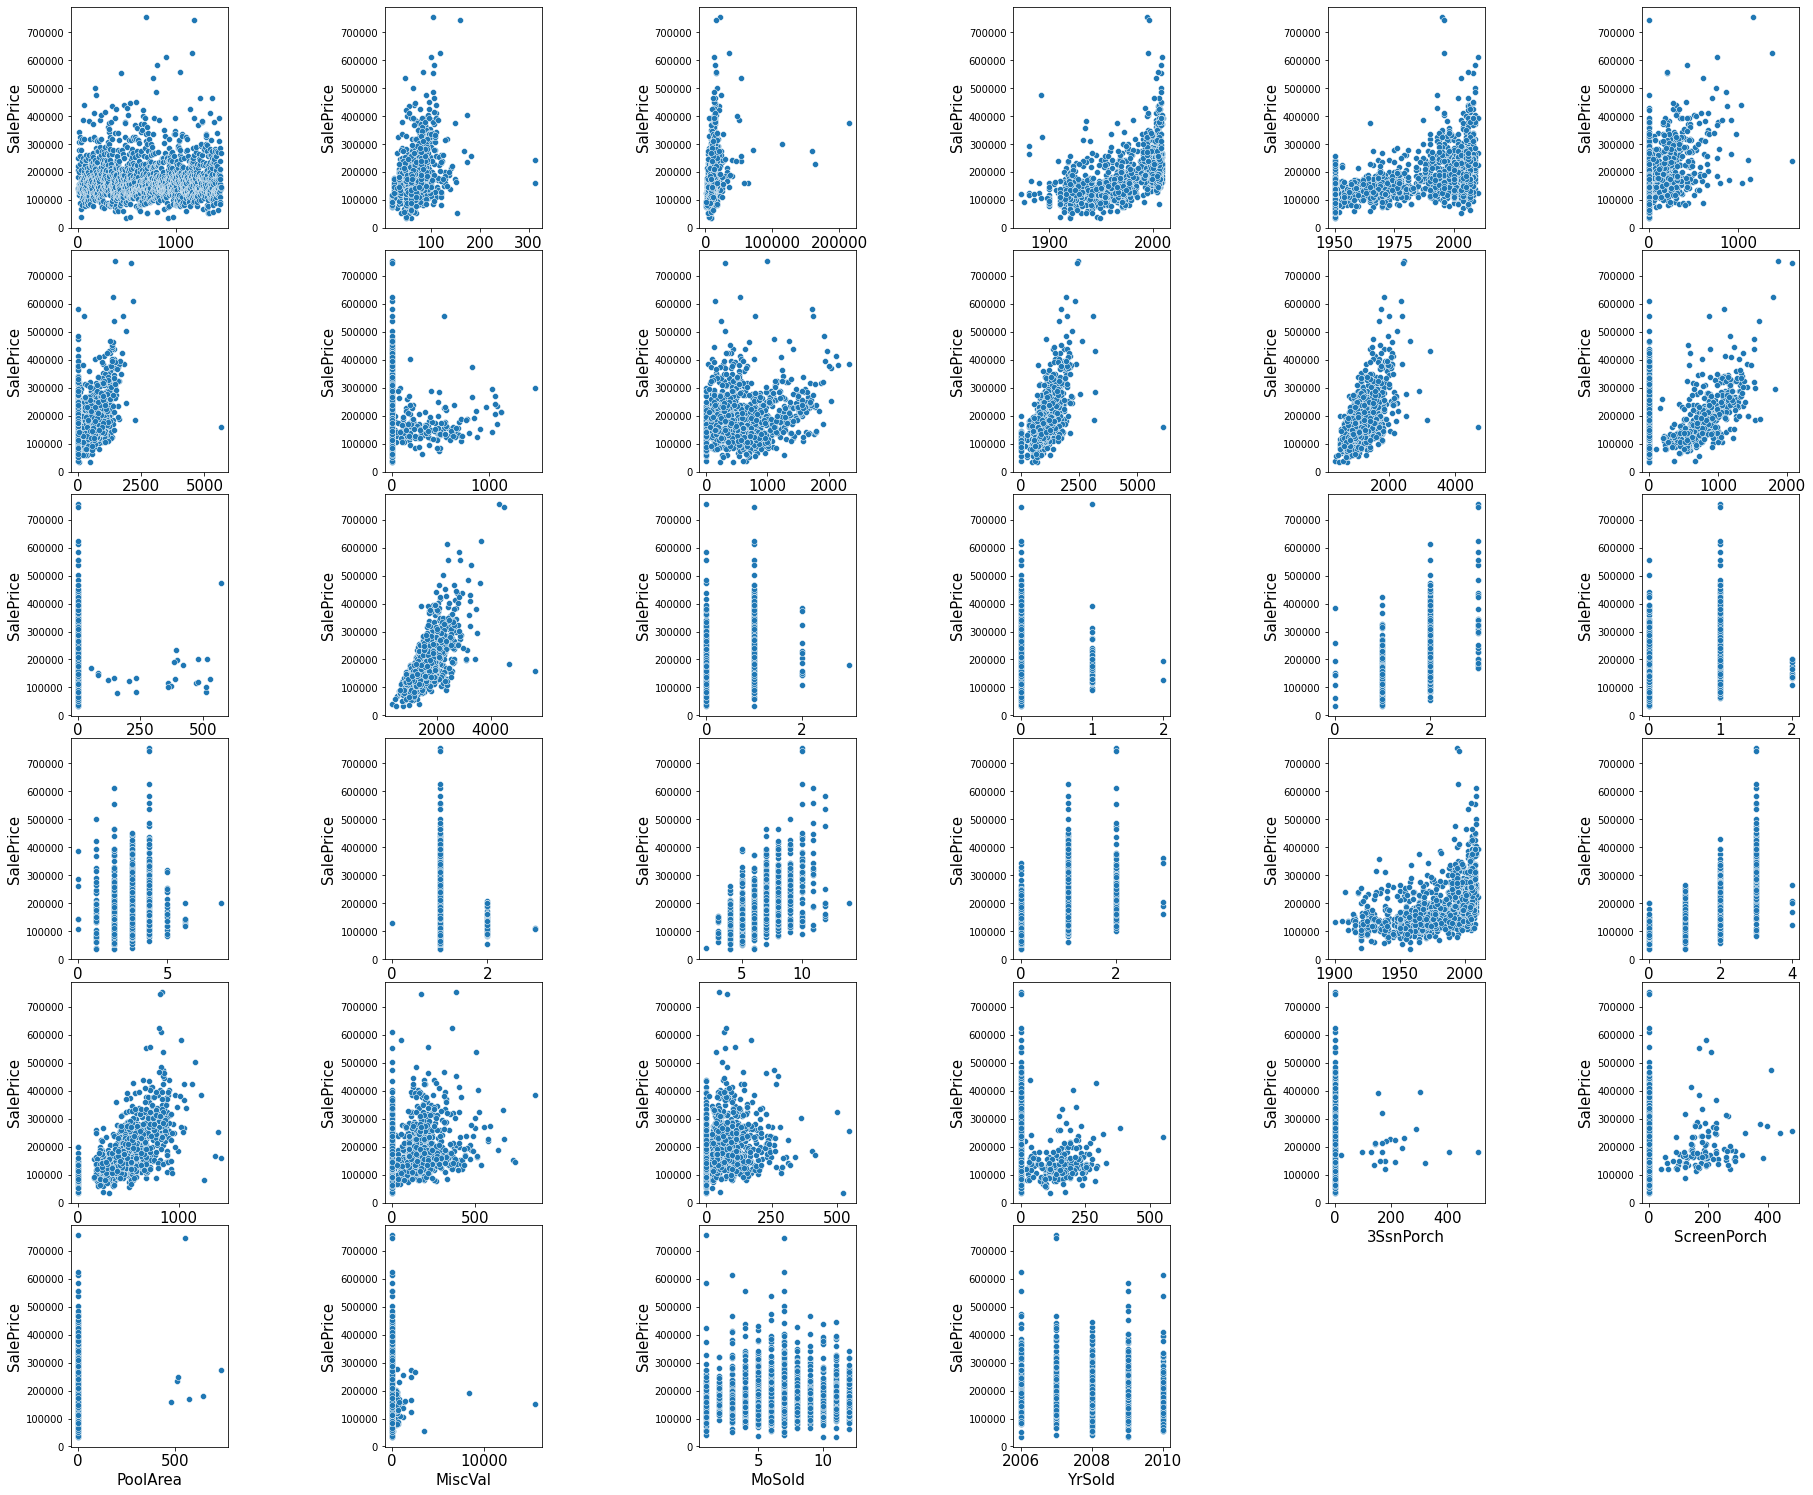

In [226]:
matplotlib.rc('ytick', labelsize=10) 
font = {'size'   : 15}

matplotlib.rc('font', **font)
def createScatterPlotsForNumericFeatures(numerical_cols):
  independent_features = numerical_cols
  independent_features.remove('SalePrice')
  fig, axes = plt.subplots(math.ceil(len(independent_features)/6), 6)
  col=0
  row=0
  for num_col in independent_features:
    sns.scatterplot(data=house_df, x=num_col,y='SalePrice', ax=axes[row][col])
    col+=1
    if(col==6):
      col=0
      row+=1
  for col in range(col,6):
    axes[row, col].axis('off')

  plt.subplots_adjust(left=0,
                      bottom=0, 
                      right=4, 
                      top=5, 
                      wspace=1, 
                      hspace=0.1)
  
  plt.show()
createScatterPlotsForNumericFeatures(numerical_cols)

### Observations


*   SalesPrice has High positive correlation with Total Basement SquareFeet,Garage cars, 1st Floor SQFT, Garage Area, GrLive Area, LotArea
*   And it has high negative correlation with Age of building and Age of remodel.

* We can also see there is high correlation among the features itself. example Ground Living area has high + correlation with total rooms above ground, 2ndflr sqft, Fullbath, bedrooms above grnd etc



### Bi-Variate Analysis with Categorical features vs Target Variable

In [227]:
def plotBoxPlotForCategorical():
  def create_hist_plot(x_var,y_var,row,col,title,bins):
    tr1 = go.Box(x=house_df[x_var],y=house_df[y_var])
    tr1.update(name=title)
    fig.add_trace(tr1,row,col)
    fig.update_xaxes(title={
          'text': title},row=row,col=col)

  fig = make_subplots(math.ceil(len(categorical_cols)/6), 6,shared_yaxes=True,vertical_spacing=0.08)

  col=1
  row=1
  for column in categorical_cols:
    create_hist_plot(column,'SalePrice',row,col,column,0)
    col+=1
    if(col==7):
      col=1
      row+=1


  fig.update_layout(width=1500,height=2000,barmode='group', bargap=0.15)
  fig.update_yaxes(title={'text':"House Price"})
  fig.show()
plotBoxPlotForCategorical()

## Observations

*   OverAllQuality - As rating goes from 1(Bad) to 10 (Excellent) - Price is going higher.

*   ExterQual - Evaluates the quality of the material on the exterior - EX(Excellent) - has higher sale price
*   PoolQC - homes which have excellent Pool higher sale price

*   Similarly in many of Excellent categories we can see sales price is higher


## Step 3: Data Cleaning and Derive New Columns



In [228]:
# Get columns which have NaN values
house_df[house_df.loc[:,(house_df.isna().sum() > 0)].columns].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [229]:
# Fill with zero for these columns as there might not be Fence, Lotfrontage etc
house_df[['MasVnrArea','LotFrontage']] = house_df[['MasVnrArea','LotFrontage']].fillna( house_df[['MasVnrArea','LotFrontage']].mean())

In [230]:
# Alley - NaN means No Alley
# PoolQC - NaN means no Pool
# MasVnrType - NaN - is None
# ^Bsmt - NaN - No Basement
# ^Garage - NaN - No Garage
# FireplaceQu - NaN - No Fireplace
house_df['Alley'].fillna('No Alley',inplace=True)
house_df['PoolQC'].fillna('No Pool',inplace=True)
house_df['Fence'].fillna('No Fence',inplace=True)
house_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = house_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('No Basement')
house_df[['GarageType','GarageFinish','GarageQual','GarageCond']] = house_df[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('No Garage')
house_df.MasVnrType.fillna('None',inplace=True)
house_df.FireplaceQu.fillna('No Fireplace',inplace=True)

In [231]:
# GarageYrBlt - drop this column as well because there are other columns that represents the No Garage and Year built would not be significant as there is year built already
house_df.drop('GarageYrBlt',axis=1,inplace=True)
house_df.drop('MiscFeature',axis=1,inplace=True)
house_df.drop('Id',axis=1,inplace=True)

In [232]:
house_df['age'] = house_df['YrSold'] - house_df['YearBuilt']
house_df['age_remodel'] = house_df['YrSold'] - house_df['YearRemodAdd']

In [233]:
# Drop the columns 'YearBuilt', 'YrSold' and 'YearRemodAdd'
house_df.drop(columns=['YrSold','YearBuilt','YearRemodAdd'],axis=1,inplace=True)

In [234]:
# As per above EDA, LotArea has some outliers and so let's remove it using IQR range
Q1 = house_df.LotArea.quantile(0.1)
Q3 = house_df.LotArea.quantile(0.9)
IQR = Q3-Q1
house_df = house_df[(house_df['LotArea'] <= (Q3 + 1.5*IQR))&(house_df['LotArea'] >= (Q1 - 1.5*IQR))]

# Remove MasVnrArea outliers

Q1 = house_df.MasVnrArea.quantile(0.1)
Q3 = house_df.MasVnrArea.quantile(0.9)
IQR = Q3-Q1
house_df = house_df[(house_df['MasVnrArea'] <= (Q3 + 1.5*IQR))&(house_df['MasVnrArea'] >= (Q1 - 1.5*IQR))]



In [235]:
house_df.shape

(1423, 77)

## Step 3: Data Preparation



In [236]:
numerical_cols,categorical_cols = getNumericAndCategorical()


In [237]:
# Split train and test data
np.random.seed(1)
house_train_df, house_test_df = train_test_split(house_df,train_size=0.7, test_size=0.3, random_state=100)

#### Data Pre-Processing
1) Let's scale the continuous numerical variables using StandardScaler - scaling helps to converge the faster and also will not lead to mis-interpretations due to high magnitudes.

2) Use one-hot encode for categorical features.

We are using here ColumnTransformer pipeline to do this.

In [238]:
preprocess_pipeline = ColumnTransformer([
                                         ('numericaltransformer',StandardScaler(),numerical_cols),
                                         ('categorical',OneHotEncoder(drop='first',dtype=np.int64,sparse=True,handle_unknown='ignore'),categorical_cols)

                                         
],remainder='passthrough')
house_train_ndarray = preprocess_pipeline.fit_transform(house_train_df)

In [239]:
house_train_df = pd.DataFrame.sparse.from_spmatrix(house_train_ndarray,columns=preprocess_pipeline.get_feature_names_out())

In [240]:
house_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Columns: 274 entries, numericaltransformer__LotFrontage to categorical__SaleCondition_Partial
dtypes: Sparse[float64, 0](274)
memory usage: 821.2 KB


## Step 4: Model Building and Evaluation


## Ridge Regression

In [241]:
X_cols = list(house_train_df.columns)

In [242]:
X_cols.remove('numericaltransformer__SalePrice')

In [243]:
#Create Folds
folds = KFold(n_splits=5, shuffle=True, random_state=1)

#Set Hyper parameters for tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,2.5, 3.0, 
 3.5,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

ridge_model = GridSearchCV(estimator=ridge,
                           param_grid=params,
                           scoring='r2',
                           cv=folds,
                           return_train_score=True)
y_train = house_train_df['numericaltransformer__SalePrice']
X_train = house_train_df[X_cols]

ridge_model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 2.5,
                                   3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2')

In [244]:
# Check the best parameters
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 3.5}
0.8871704607406959


In [245]:
ridge_results = pd.DataFrame(ridge_model.cv_results_)
ridge_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.316314,0.033604,0.050260,0.014945,0.0001,{'alpha': 0.0001},0.869452,0.855635,0.819064,0.878411,0.835387,0.851590,0.021796,27,0.955580,0.955099,0.957019,0.947053,0.952250,0.953400,0.003531
1,0.359563,0.189734,0.047034,0.008907,0.001,{'alpha': 0.001},0.871131,0.855685,0.814509,0.878485,0.835181,0.850998,0.023514,28,0.955808,0.955099,0.957175,0.947053,0.952332,0.953493,0.003586
2,0.177491,0.063700,0.073956,0.095321,0.01,{'alpha': 0.01},0.869941,0.856170,0.827258,0.878229,0.836778,0.853675,0.019272,26,0.955653,0.955098,0.956927,0.947201,0.952246,0.953425,0.003469
3,0.158463,0.079227,0.021944,0.001224,0.05,{'alpha': 0.05},0.868673,0.858116,0.848787,0.883594,0.844141,0.860662,0.014216,24,0.955268,0.955080,0.956287,0.946692,0.952007,0.953067,0.003494
4,0.115635,0.003571,0.020786,0.000861,0.1,{'alpha': 0.1},0.870025,0.860307,0.868975,0.885428,0.848752,0.866697,0.012083,23,0.954625,0.955028,0.955039,0.946637,0.951885,0.952643,0.003225
5,0.154543,0.077250,0.020589,0.000332,0.2,{'alpha': 0.2},0.869851,0.865642,0.875158,0.889428,0.857597,0.871535,0.010631,21,0.954222,0.954519,0.954292,0.946297,0.951050,0.952076,0.003160
6,0.145879,0.070600,0.022609,0.002081,0.3,{'alpha': 0.3},0.868276,0.866623,0.880227,0.891996,0.862974,0.874019,0.010690,20,0.953672,0.954424,0.953539,0.945910,0.950572,0.951623,0.003145
7,0.113716,0.003382,0.054319,0.067403,0.4,{'alpha': 0.4},0.871237,0.870601,0.883670,0.894278,0.865727,0.877103,0.010433,19,0.953556,0.953924,0.952931,0.945664,0.950303,0.951275,0.003079
8,0.111867,0.004231,0.020506,0.000619,0.5,{'alpha': 0.5},0.871094,0.872201,0.884201,0.895348,0.867662,0.878101,0.010272,17,0.953012,0.953707,0.952547,0.945278,0.949801,0.950869,0.003094
9,0.150564,0.075769,0.020901,0.000990,0.6,{'alpha': 0.6},0.872072,0.873620,0.886974,0.896180,0.871424,0.880054,0.009874,16,0.952797,0.953475,0.951937,0.944989,0.949295,0.950499,0.003099


In [246]:
fig = px.line(ridge_results,x='param_alpha',y=['mean_train_score','mean_test_score'],log_x=True)

fig.show()

#### Observations
- From above graph we can see that as alpha/lambda increases, there is increase in R-Score until 3.5 and then started decreasing and so optimal lamda is 3.5
- We got same values when we call bestparam method.
#### Build a Ridge Model with Optimal Alpha 3.5

In [247]:
ridge_model = Ridge(alpha=3.5)
ridge_model.fit(X_train,y_train)

Ridge(alpha=3.5)

In [248]:
def getModelEquation(type, intercept, features, coeff):
    feature_coeff = list(zip(features, coeff))
    feature_coeff.sort(key=lambda x:x[1], reverse=True)
    house_pred_equa=type+' House Prediction='+str(intercept)+'+'
    for feature, coeff in feature_coeff:
        house_pred_equa+="("+str(coeff)+"*"+feature.split('__')[1]+')+'
    return house_pred_equa

In [249]:
def getTop10SignificantFeatures(features, coeff):
    feature_coeff = pd.DataFrame(list(zip(features , coeff)), columns=['features','coefficient'])
    feature_coeff.features = feature_coeff.features.apply(lambda x: x.split('__')[1])
    feature_coeff=feature_coeff.sort_values(by='coefficient',ascending=False)
    return (feature_coeff[0:10],feature_coeff[0:10].to_html())


In [250]:
# Ridge Model House Prediction Equation
print(getModelEquation('Ridge',ridge_model.intercept_,ridge_model.feature_names_in_ , ridge_model.coef_).rstrip('+'))

Ridge House Prediction=-0.2862852476733827+(0.6936093754650351*OverallQual_10)+(0.34803024474470085*Neighborhood_StoneBr)+(0.31584253307715254*OverallCond_9)+(0.2617408991948383*OverallQual_9)+(0.23876489450917907*Neighborhood_NoRidge)+(0.22706055555523538*Functional_Typ)+(0.22488345006854052*Exterior1st_BrkFace)+(0.20854215078273886*GrLivArea)+(0.19869605648120572*BsmtExposure_Gd)+(0.1966000124385402*Neighborhood_Crawfor)+(0.1961301637025117*Neighborhood_NridgHt)+(0.19224163732972924*SaleType_New)+(0.17016209029703153*2ndFlrSF)+(0.15363294760552862*RoofMatl_WdShngl)+(0.14755490375140623*MSZoning_FV)+(0.14367117922167397*Exterior2nd_ImStucc)+(0.13188812714727122*TotalBsmtSF)+(0.12566715639215334*OverallCond_7)+(0.12549832059464233*Neighborhood_NPkVill)+(0.12454247248773923*Condition1_Norm)+(0.12315912602329195*Street_Pave)+(0.1154007870960179*BsmtFinSF1)+(0.11144863268245675*MSSubClass_70)+(0.11000623956710201*SaleCondition_AdjLand)+(0.10998824317894314*RoofStyle_Gambrel)+(0.1055387743

### Analyse Error Terms

In [251]:
y_train_pred = ridge_model.predict(X_train)
residuals = y_train - y_train_pred
train_rscore = r2_score(y_train,y_train_pred)
print(f"Train R-Square is {train_rscore}")

Train R-Square is 0.9409985124934405


In [252]:
fig = px.histogram(residuals)
fig.update_xaxes(title='residuals')
fig.show()

#### Observations

Residuals are normally distributed

In [253]:
fig = px.scatter(y_train_pred,residuals)
fig.update_xaxes(title='Predictions')
fig.update_yaxes(title='Residuals')
fig.show()

#### Observations

There is no any patterns on error terms and also variance seems pretty constant except at right some couple of points

## Model Evaluation on Test data

In [254]:
house_test_ndarray = preprocess_pipeline.transform(house_test_df)

In [255]:
house_test_df = pd.DataFrame.sparse.from_spmatrix(house_test_ndarray,columns=preprocess_pipeline.get_feature_names_out())

In [256]:
y_test = house_test_df['numericaltransformer__SalePrice']
X_test = house_test_df[X_cols]

In [257]:
y_test_pred = ridge_model.predict(X_test)

In [258]:
def getmodelMetrics(y_test, y_test_pred,y_train,y_trai_pred):
  metrics=[]

  r2_score_train=r2_score(y_train, y_trai_pred)
  mse_train= mean_squared_error(y_train,y_trai_pred)
  rmse_train = mse_train**0.5

  r2_score_test=r2_score(y_test, y_test_pred)
  mse_test= mean_squared_error(y_test,y_test_pred)
  rmse_test = mse_test**0.5

  metrics.append(r2_score_train)
  metrics.append(mse_train)
  metrics.append(rmse_train)  

  metrics.append(r2_score_test)
  metrics.append(mse_test)
  metrics.append(rmse_test)

  print(f'R2-Score Train is {r2_score_train}')
  print(f'Mean Square Error Train is {mse_train}')
  print(f'Roow Mean Square Error Train is {rmse_train}')
  print(f'R2-Score Test is {r2_score_test}')
  print(f'Mean Square Error Test is {mse_test}')
  print(f'Root Mean Square Error Test is {rmse_test}')
  return metrics

In [259]:
ridge_metrics = getmodelMetrics(y_test,y_test_pred,y_train,y_train_pred)

R2-Score Train is 0.9409985124934405
Mean Square Error Train is 0.05900148750655954
Roow Mean Square Error Train is 0.24290221799431874
R2-Score Test is 0.915457221257214
Mean Square Error Test is 0.08295064878528148
Root Mean Square Error Test is 0.28801154279868973


In [260]:
# Ridge Model - House Prediction Top 10 Significant features and their coefficients
print(getTop10SignificantFeatures(ridge_model.feature_names_in_ , ridge_model.coef_)[0])

                 features  coefficient
120        OverallQual_10     0.693609
85   Neighborhood_StoneBr     0.348030
128         OverallCond_9     0.315843
119         OverallQual_9     0.261741
78   Neighborhood_NoRidge     0.238765
226        Functional_Typ     0.227061
139   Exterior1st_BrkFace     0.224883
10              GrLivArea     0.208542
189       BsmtExposure_Gd     0.198696
69   Neighborhood_Crawfor     0.196600


##### Observations

- Our Model Train R-Square is 0.9409985125478542 and Test R-Square is 0.9154572141126628.

- The top 10 significant variables are 'OverallQual_10' 'Neighborhood_StoneBr' 'OverallCond_9' 'OverallQual_9', 'Neighborhood_NoRidge' 'Functional_Typ' 'Exterior1st_BrkFace' 'GrLivArea', 'BsmtExposure_Gd' 'Neighborhood_Crawfor'.

## Lasso Regression

In [261]:
params = {'alpha': [0.0001, 0.0005, 0.0009,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0 ]}
def buildAndGetLassoModelResults(params):
    lasso = Lasso(tol=7e-4)
    lasso_model = GridSearchCV(estimator=lasso,
                            param_grid=params,
                            cv=folds,
                            scoring='r2',
                            return_train_score=True
    )

    lasso_model.fit(X_train,y_train)
    lasso_results = pd.DataFrame(lasso_model.cv_results_)
    return (lasso_model.best_params_,lasso_model.best_score_,lasso_results)
alpha, rscore, lassoresults = buildAndGetLassoModelResults(params)


In [262]:
#print best alpha and r-score
print('alpha:',alpha)
print('r-score:' ,rscore)

alpha: {'alpha': 0.001}
r-score: 0.895336971018555


In [263]:
fig = px.line(lassoresults,x='param_alpha',y=['mean_train_score','mean_test_score'],log_x=True)
fig.show()

#### Observation

- The best lambda value for Lasso regression id  0.001 and after that R-score got decreased.

### Build Lasso Model with Final Best Alpha 0.001

In [264]:
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.001)

In [265]:
y_train_pred = lasso_model.predict(X_train)

In [266]:
print('Lasso Model Train R-Score:',r2_score(y_train,y_train_pred))

Lasso Model Train R-Score: 0.935200485496919


Residual Analysis

In [267]:
residuals = y_train - y_train_pred

In [268]:
fig = px.histogram(residuals)
fig.update_xaxes(title='residuals')
fig.show()

In [269]:
fig = px.scatter(y_train_pred,residuals)
fig.update_xaxes(title='Predictions')
fig.update_yaxes(title='Residuals')
fig.show()

#### Observations

Error terms are normally distributed and have constant variance and no patterns observed

#### Model Evaluation

In [270]:
y_test_pred = lasso_model.predict(X_test)

In [271]:
lasso_metrics = getmodelMetrics(y_test,y_test_pred,y_train,y_train_pred)

R2-Score Train is 0.935200485496919
Mean Square Error Train is 0.06479951450308097
Roow Mean Square Error Train is 0.2545574876193607
R2-Score Test is 0.9201671252287877
Mean Square Error Test is 0.07832944285890588
Root Mean Square Error Test is 0.27987397674472325


In [272]:
print(lasso_metrics)

[0.935200485496919, 0.06479951450308097, 0.2545574876193607, 0.9201671252287877, 0.07832944285890588, 0.27987397674472325]


In [273]:
print(getModelEquation('Lasso',lasso_model.intercept_,lasso_model.feature_names_in_ , lasso_model.coef_).rstrip('+'))

Lasso House Prediction=-0.30398831604927473+(1.4497736091906284*OverallQual_10)+(0.6588901763434732*OverallQual_9)+(0.3464558544577409*GrLivArea)+(0.33955954590658805*Neighborhood_StoneBr)+(0.3078520306337739*SaleType_New)+(0.2766770588161336*OverallQual_8)+(0.2748489292829179*Neighborhood_Crawfor)+(0.2663305641682858*OverallCond_9)+(0.26261616452184167*Neighborhood_NoRidge)+(0.23727284456694792*Exterior1st_BrkFace)+(0.21776322857149405*Neighborhood_NridgHt)+(0.2097726192201768*Functional_Typ)+(0.19289368041530794*BsmtExposure_Gd)+(0.11724815520485306*Neighborhood_BrkSide)+(0.10823915253257556*TotalBsmtSF)+(0.10613638360667003*Condition1_Norm)+(0.1049450121410171*OverallCond_7)+(0.09962380273957354*BsmtFinSF1)+(0.09713993920757476*MSZoning_FV)+(0.08774408777439793*OverallCond_8)+(0.08226251836274859*OverallQual_7)+(0.07267016685508504*SaleCondition_Normal)+(0.06991100248773673*HouseStyle_1.5Unf)+(0.06568993111645202*BsmtFinType1_GLQ)+(0.06543564261548881*Exterior2nd_ImStucc)+(0.0628903

In [274]:
print(getTop10SignificantFeatures(lasso_model.feature_names_in_,lasso_model.coef_)[0])

                 features  coefficient
120        OverallQual_10     1.449774
119         OverallQual_9     0.658890
10              GrLivArea     0.346456
85   Neighborhood_StoneBr     0.339560
265          SaleType_New     0.307852
118         OverallQual_8     0.276677
69   Neighborhood_Crawfor     0.274849
128         OverallCond_9     0.266331
78   Neighborhood_NoRidge     0.262616
139   Exterior1st_BrkFace     0.237273


#### Observations
- Lasso Model Train R-Score: 0.935200485496919 and Test R-Score: 0.9201671252287877
- Top 10 Significant variables:'OverallQual_10' 'OverallQual_9' 'GrLivArea' 'Neighborhood_StoneBr', 'SaleType_New' 'OverallQual_8' 'Neighborhood_Crawfor' 'OverallCond_9', 'Neighborhood_NoRidge' 'Exterior1st_BrkFace'

### Ridge and Lasso Comparison Metrics

In [275]:
metricnames = ['R2-Score_Train','MSE_Train','RMSE_Train','R2-Score_Test','MSE_Test','RMSE_Test']
metrics_df = pd.DataFrame(list(zip(metricnames, ridge_metrics, lasso_metrics)), columns=['Metric Name','Ridge','Lasso'])

In [276]:
metrics_df.set_index('Metric Name')

,Ridge,Lasso
Metric Name,,
R2-Score_Train,0.940999,0.935200
MSE_Train,0.059001,0.064800
RMSE_Train,0.242902,0.254557
R2-Score_Test,0.915457,0.920167
MSE_Test,0.082951,0.078329
RMSE_Test,0.288012,0.279874


### Observations
 - Though Ridge is performing better during Training, Lasso if well performed in unseen data.

# Final Inferences

- Ridge model optimal lamda value : **3.5**
- Lasso Model optimal lamda value: **0.001**
- Ridge Model Train R-Square is **0.9409985125478542** and Test R-Square is **0.9154572141126628**.
- Lasso Model Train R-Score:**0.935200485496919** and Test R-Score: **0.9201671252287877**
- So Lasso Model is performing better than Ridge for this prediction and also it's complexity is lower as it eliminated many of the features as we can see coefficients are zero.
- Top 10 Significant features and their co-efficients.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>features</th>
      <th>coefficient</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>120</th>
      <td>OverallQual_10</td>
      <td>1.449774</td>
    </tr>
    <tr>
      <th>119</th>
      <td>OverallQual_9</td>
      <td>0.658890</td>
    </tr>
    <tr>
      <th>10</th>
      <td>GrLivArea</td>
      <td>0.346456</td>
    </tr>
    <tr>
      <th>85</th>
      <td>Neighborhood_StoneBr</td>
      <td>0.339560</td>
    </tr>
    <tr>
      <th>265</th>
      <td>SaleType_New</td>
      <td>0.307852</td>
    </tr>
    <tr>
      <th>118</th>
      <td>OverallQual_8</td>
      <td>0.276677</td>
    </tr>
    <tr>
      <th>69</th>
      <td>Neighborhood_Crawfor</td>
      <td>0.274849</td>
    </tr>
    <tr>
      <th>128</th>
      <td>OverallCond_9</td>
      <td>0.266331</td>
    </tr>
    <tr>
      <th>78</th>
      <td>Neighborhood_NoRidge</td>
      <td>0.262616</td>
    </tr>
    <tr>
      <th>139</th>
      <td>Exterior1st_BrkFace</td>
      <td>0.237273</td>
    </tr>
  </tbody>
</table>

#### Below are the few variables description on house price prediction.

- OverallQual10 - if overall material and finish of the house is Very Excellent, house price will increase by 1.45 times.
- OverallQual_9 - if overall material and finish of the house is Excellent, house price will increase by 0.66 times.
- GrLivArea     - A unit increase in the above grade (ground) living area square feet increase the house price by 0.346456 times.
- Neighborhood_StoneBr     - if Physical locations within Ames city limits is StoneBr price house tends to increase by 0.339560 times.







---


# PART2 - Subjective Questions - Coding

---






In [277]:
## Let's double the alpha for both ridge and Lasso regreesion as 7 and 0.002

ridge = Ridge(alpha=7)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
ridgemetrics = getmodelMetrics(y_test,y_test_pred,y_train,y_train_pred)

R2-Score Train is 0.9367172668151091
Mean Square Error Train is 0.06328273318489089
Roow Mean Square Error Train is 0.25156059545344317
R2-Score Test is 0.9179777563105672
Mean Square Error Test is 0.08047758105470917
Root Mean Square Error Test is 0.2836857082313263


In [278]:
print(getTop10SignificantFeatures(ridge.feature_names_in_,ridge.coef_)[0])

                 features  coefficient
120        OverallQual_10     0.519910
85   Neighborhood_StoneBr     0.283701
128         OverallCond_9     0.271303
119         OverallQual_9     0.236397
78   Neighborhood_NoRidge     0.223703
226        Functional_Typ     0.214295
10              GrLivArea     0.205905
69   Neighborhood_Crawfor     0.185729
139   Exterior1st_BrkFace     0.184958
189       BsmtExposure_Gd     0.183715


In [279]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
lassometrics = getmodelMetrics(y_test,y_test_pred,y_train,y_train_pred)

R2-Score Train is 0.9279439506093943
Mean Square Error Train is 0.07205604939060575
Roow Mean Square Error Train is 0.26843257885473915
R2-Score Test is 0.9206679153965857
Mean Square Error Test is 0.07783808369208091
Root Mean Square Error Test is 0.27899477359276986


In [280]:
metricnames = ['R2-Score_Train','MSE_Train','RMSE_Train','R2-Score_Test','MSE_Test','RMSE_Test']
metrics_df_doublealpha = pd.DataFrame(list(zip(metricnames, ridgemetrics, lassometrics)), columns=['Metric Name','Ridge_DoubleAlpha','Lasso_DoubleAlpha'])
metrics_df_doublealpha.set_index('Metric Name')

,Ridge_DoubleAlpha,Lasso_DoubleAlpha
Metric Name,,
R2-Score_Train,0.936717,0.927944
MSE_Train,0.063283,0.072056
RMSE_Train,0.251561,0.268433
R2-Score_Test,0.917978,0.920668
MSE_Test,0.080478,0.077838
RMSE_Test,0.283686,0.278995


In [281]:
metrics_df.merge(metrics_df_doublealpha,how='inner')

,Metric Name,Ridge,Lasso,Ridge_DoubleAlpha,Lasso_DoubleAlpha
0,R2-Score_Train,0.940999,0.935200,0.936717,0.927944
1,MSE_Train,0.059001,0.064800,0.063283,0.072056
2,RMSE_Train,0.242902,0.254557,0.251561,0.268433
3,R2-Score_Test,0.915457,0.920167,0.917978,0.920668
4,MSE_Test,0.082951,0.078329,0.080478,0.077838
5,RMSE_Test,0.288012,0.279874,0.283686,0.278995


In [282]:
print(getTop10SignificantFeatures(lasso.feature_names_in_,lasso.coef_)[0])

                 features  coefficient
120        OverallQual_10     1.340337
119         OverallQual_9     0.613546
10              GrLivArea     0.361475
265          SaleType_New     0.295306
69   Neighborhood_Crawfor     0.268876
85   Neighborhood_StoneBr     0.250009
118         OverallQual_8     0.230934
226        Functional_Typ     0.219956
139   Exterior1st_BrkFace     0.208813
78   Neighborhood_NoRidge     0.190664


In [283]:
print(getTop10SignificantFeatures(ridge.feature_names_in_,ridge.coef_)[0])

                 features  coefficient
120        OverallQual_10     0.519910
85   Neighborhood_StoneBr     0.283701
128         OverallCond_9     0.271303
119         OverallQual_9     0.236397
78   Neighborhood_NoRidge     0.223703
226        Functional_Typ     0.214295
10              GrLivArea     0.205905
69   Neighborhood_Crawfor     0.185729
139   Exterior1st_BrkFace     0.184958
189       BsmtExposure_Gd     0.183715


In [284]:
X_train.columns

Index(['numericaltransformer__LotFrontage', 'numericaltransformer__LotArea',
       'numericaltransformer__MasVnrArea', 'numericaltransformer__BsmtFinSF1',
       'numericaltransformer__BsmtFinSF2', 'numericaltransformer__BsmtUnfSF',
       'numericaltransformer__TotalBsmtSF', 'numericaltransformer__1stFlrSF',
       'numericaltransformer__2ndFlrSF', 'numericaltransformer__LowQualFinSF',
       ...
       'categorical__SaleType_ConLI', 'categorical__SaleType_ConLw',
       'categorical__SaleType_New', 'categorical__SaleType_Oth',
       'categorical__SaleType_WD', 'categorical__SaleCondition_AdjLand',
       'categorical__SaleCondition_Alloca',
       'categorical__SaleCondition_Family',
       'categorical__SaleCondition_Normal',
       'categorical__SaleCondition_Partial'],
      dtype='object', length=273)

In [285]:
X_train_new = X_train.drop(['categorical__OverallQual_10', 'categorical__OverallQual_9' ,'numericaltransformer__GrLivArea' ,
                            'categorical__Neighborhood_StoneBr', 'categorical__SaleType_New'],axis=1)
X_test_new = X_test.drop(['categorical__OverallQual_10', 'categorical__OverallQual_9' ,'numericaltransformer__GrLivArea' ,
                            'categorical__Neighborhood_StoneBr', 'categorical__SaleType_New'],axis=1)

In [286]:
lasso_new = Lasso(alpha=0.001)
lasso_new.fit(X_train_new,y_train)
print(getTop10SignificantFeatures(lasso_new.feature_names_in_,lasso_new.coef_)[0])

                  features  coefficient
124          OverallCond_9     0.343808
8                 2ndFlrSF     0.334168
77    Neighborhood_NoRidge     0.263747
7                 1stFlrSF     0.259503
222         Functional_Typ     0.228927
135    Exterior1st_BrkFace     0.224010
267  SaleCondition_Partial     0.218164
68    Neighborhood_Crawfor     0.207826
185        BsmtExposure_Gd     0.203705
78    Neighborhood_NridgHt     0.166739
